In [6]:
import numpy as np

image = np.array([
    [1, 2, 3],
    [4, 5, 6], 
    [7, 8, 9] 
])

kernel = np.array([ 
    [1, 0], 
    [0, -1]
])
    
feature_map = np.array([ 
    [-4,-4], 
    [-4,-4] 
])

Sobel_x_operator= np.array([ 
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1] 
]) 

def convolve(image, kernel): 
    image_x, image_y = image.shape 
    kernel_x, kernel_y = kernel.shape 


    height_radius,width_radius= np.array(kernel.shape)//2 
    print(height_radius) 
    print(width_radius)
    output= np.zeros(image.shape)

    stride = 1 
    padding= 0 
    output_x = int(((image_x - kernel_x + 2*padding)//stride)+1) 
    output_y = int(((image_y - kernel_y + 2*padding)//stride)+1) 
    print("output x dimension", output_x) 
    print("output y dimeension", output_y)


convolve(image,kernel)


1
1
output x dimension 2
output y dimeension 2


(np.float64(-0.5), np.float64(15.5), np.float64(14.5), np.float64(-0.5))

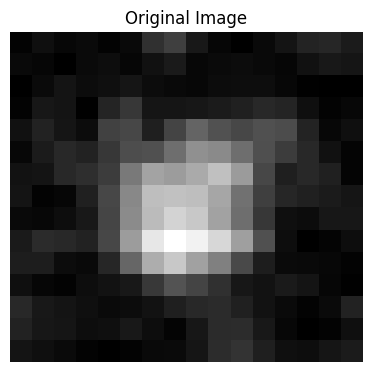

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply convolution
def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros(image.shape)
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros on the border
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Convolution operation
    for i in range(image_height):
        for j in range(image_width):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])
    
    return output

# Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Load the image in grayscale
image = cv2.imread('/Users/shalem/Documents/tumourtrace/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Apply Sobel filters to detect edges
grad_x = convolve(image, sobel_x)
grad_y = convolve(image, sobel_y)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255  # Normalize to 0-255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Display the original and Sobel edge detection output images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis

# Sobel edge de


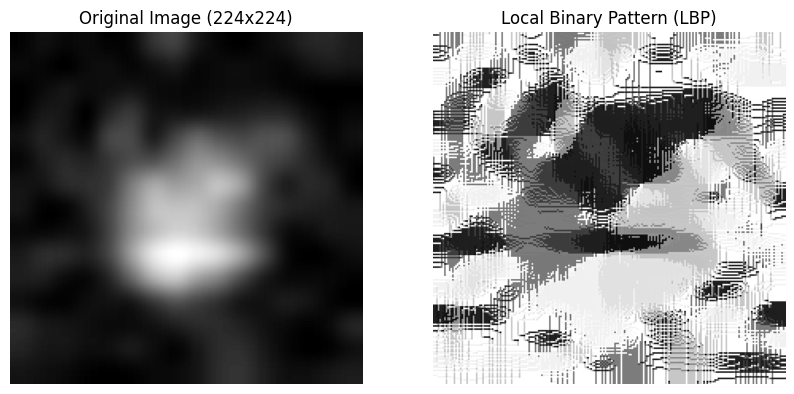

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image, convert it to grayscale, and resize to 224x224."""
    from PIL import Image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((224, 224))  # Resize image to 224x224
    return np.array(image)

def compute_lbp(image):
    """Compute the Local Binary Pattern of an image."""
    height, width = image.shape
    lbp_image = np.zeros((height - 2, width - 2), dtype=np.uint8)  # LBP image size

    # Define the LBP pattern
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            binary_string = ''
            
            # Check the 8 neighbors in clockwise order
            binary_string += '1' if image[i-1, j-1] >= center_pixel else '0'  # Top-left
            binary_string += '1' if image[i-1, j] >= center_pixel else '0'    # Top-center
            binary_string += '1' if image[i-1, j+1] >= center_pixel else '0'  # Top-right
            binary_string += '1' if image[i, j+1] >= center_pixel else '0'    # Middle-right
            binary_string += '1' if image[i+1, j+1] >= center_pixel else '0'  # Bottom-right
            binary_string += '1' if image[i+1, j] >= center_pixel else '0'    # Bottom-center
            binary_string += '1' if image[i+1, j-1] >= center_pixel else '0'  # Bottom-left
            binary_string += '1' if image[i, j-1] >= center_pixel else '0'    # Middle-left

            # Convert binary string to decimal
            lbp_value = int(binary_string, 2)
            lbp_image[i-1, j-1] = lbp_value  # Store the LBP value

    return lbp_image

def main(image_path):
    image = load_image(image_path)
    lbp_image = compute_lbp(image)

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image (224x224)')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Local Binary Pattern (LBP)')
    plt.imshow(lbp_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Example usage:
main('/Users/shalem/Documents/tumourtrace/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg')


Compute the MVM-LBP (Mean-Variance-Median Local Binary Pattern) of an image.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mvm_lbp(image):
    # Image dimensions
    height, width = image.shape
    output = np.zeros((height-2, width-2), dtype=np.uint8)

    # Traverse through each pixel (skip borders)
    for i in range(1, height-1):
        for j in range(1, width-1):
            # Get the 3x3 window around the current pixel
            window = image[i-1:i+2, j-1:j+2].flatten()
            center_pixel = image[i, j]

            # Compute the mean, variance, and median
            mean = np.mean(window)
            variance = np.var(window)
            median = np.median(window)

            # Define the threshold as a combination of mean, variance, and median
            threshold = (mean + variance + median) / 3

            # Calculate the MVM-LBP by comparing each neighbor to the threshold
            binary_pattern = 0
            for k, pixel_value in enumerate(window):
                if k != 4:  # Skip the center pixel itself
                    binary_pattern = (binary_pattern << 1) | (1 if pixel_value > threshold else 0)

            # Save the result in the output image
            output[i-1, j-1] = binary_pattern

    return output

# Load and process an image
# Replace 'path_to_image.jpg' with the path to your image
image_path = '/Users/shalem/Documents/tumourtrace/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply MVM-LBP
mvm_lbp_result = mvm_lbp(image)

# Display the original and MVM-LBP images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("MVM-LBP Result")
plt.imshow(mvm_lbp_result, cmap='gray')
plt.axis('off')

plt.show()
